# Solving the Frozen Lake Problem with Value Iteration

The Frozen Lake problem is a classic grid world problem where an agent
must navigate from a starting point to a goal while avoiding holes
(dangerous states) on a frozen lake. The goal is to find the optimal
policy that maximizes the agent’s chance of reaching the goal safely.


## Value Iteration Algorithm

Value iteration is an iterative algorithm used to compute the optimal
value function and the optimal policy for a given Markov decision
process (MDP). Here’s the value iteration algorithm for solving the
Frozen Lake problem:

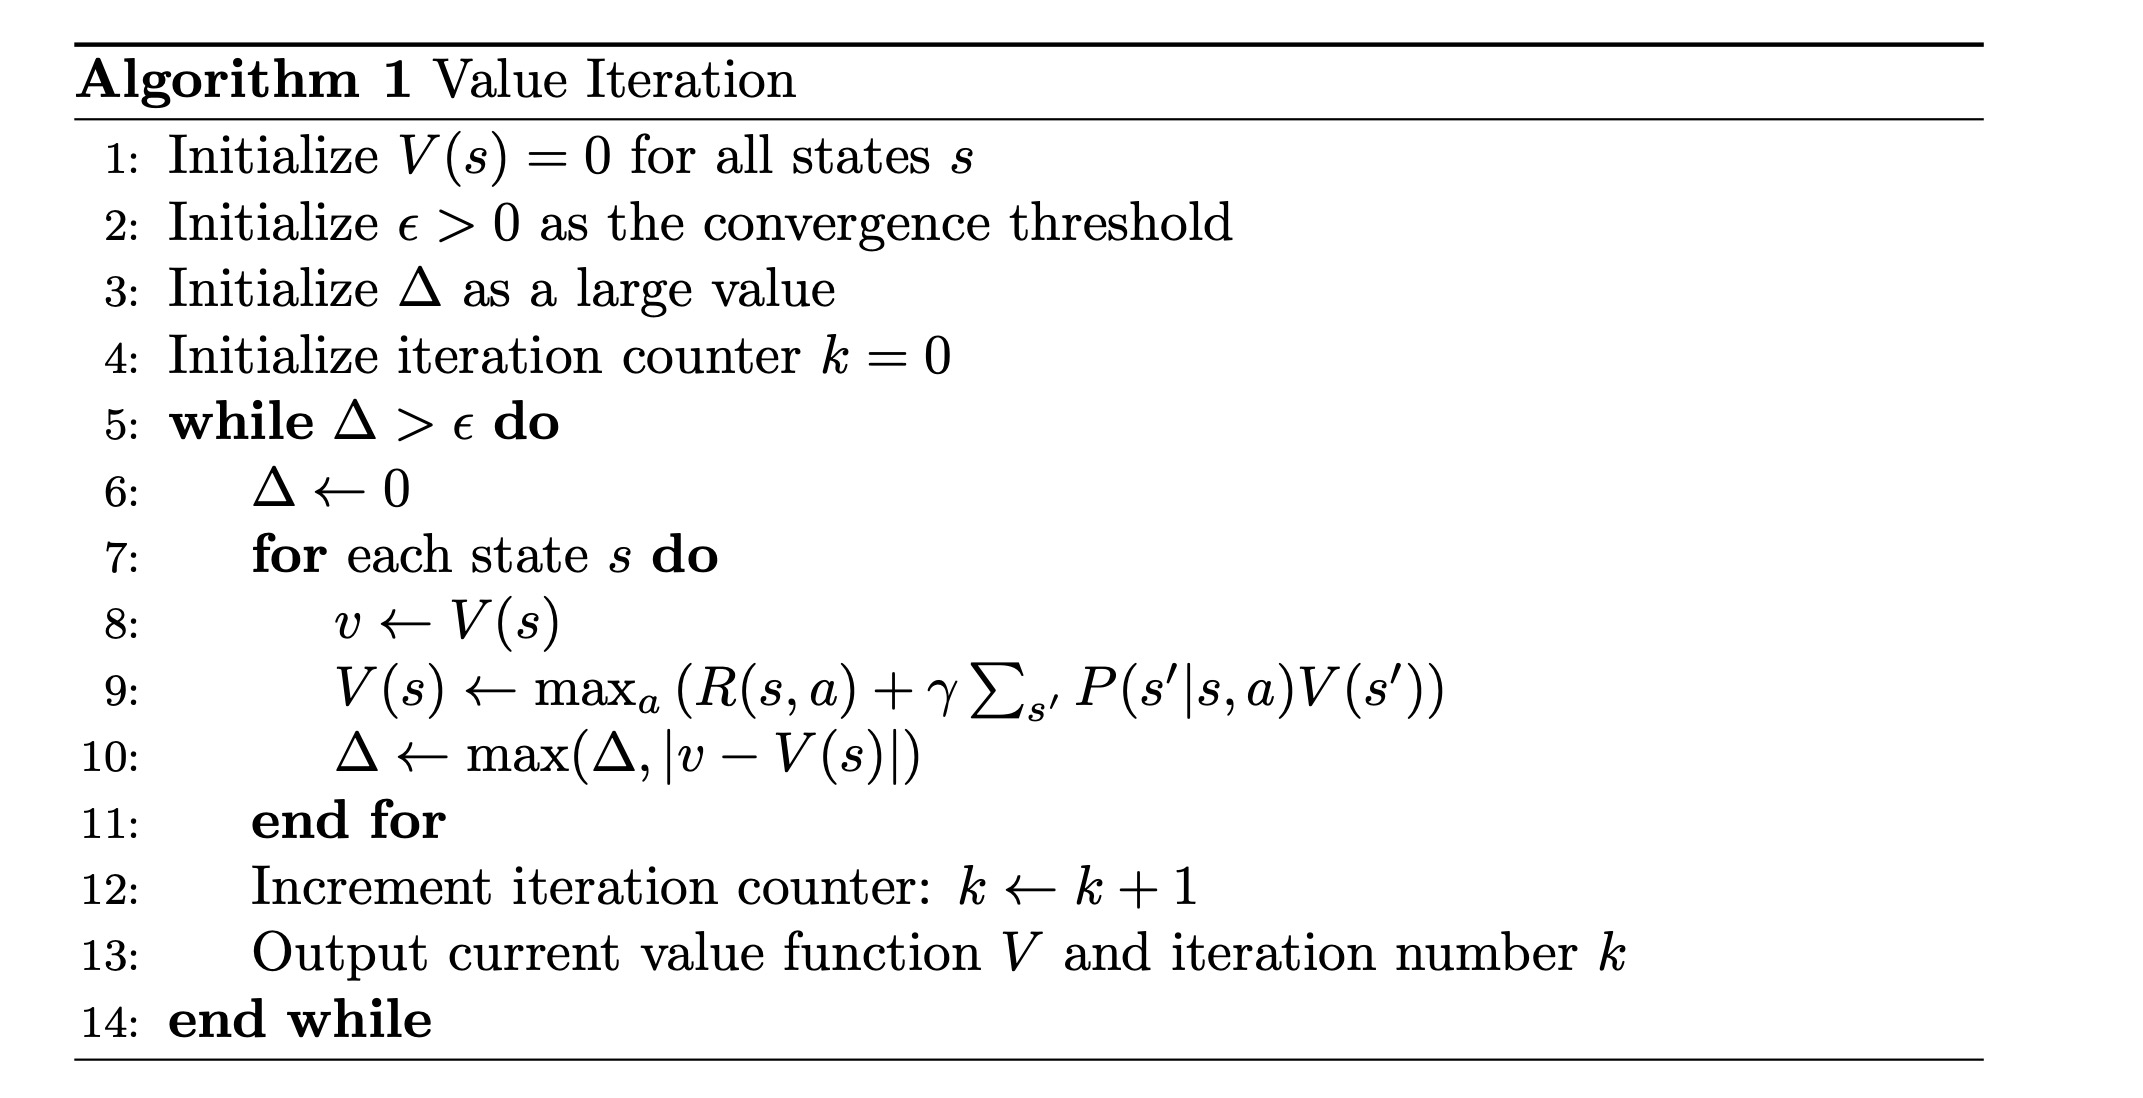

In this algorithm:

-   *V*(*s*) is the value function for state *s*, representing the
    expected cumulative reward from state *s* onwards.

-   *R*(*s*,*a*) is the immediate reward for taking action *a* in state
    *s*.

-   *γ* is the discount factor, determining the importance of future
    rewards.

-   *P*(*s*′\|*s*,*a*) is the transition probability to state *s*′ from
    state *s* after taking action *a*.

-   *ϵ* is the convergence threshold, determining when to stop
    iterating.

-   *Δ* is the maximum change in the value function across all states in
    an iteration.

-   *k* is the iteration counter, indicating the number of iterations
    performed.

The algorithm iteratively updates the value function until it converges
to the optimal value function *V*<sup>\*</sup>(*s*), which represents
the maximum expected cumulative reward from each state under the optimal
policy. Each iteration improves the estimate of the optimal value
function, leading to a better approximation of the optimal policy.

## Solution

The solution to the Frozen Lake problem using value iteration involves
applying the value iteration algorithm to compute the optimal value
function *V*<sup>\*</sup>(*s*) and the optimal policy
*π*<sup>\*</sup>(*s*) for the given MDP. The optimal policy
*π*<sup>\*</sup>(*s*) can be derived from the optimal value function
*V*<sup>\*</sup>(*s*) by selecting the action *a* in each state *s* that
maximizes the expression inside the max  operator in the Bellman
optimality equation.

In [2]:
import gym
import numpy as np

# Create the Frozen Lake environment
env = gym.make('FrozenLake-v1', render_mode='human')

# Initialize the value function V(s) to zeros
V = np.zeros(env.observation_space.n)

# Initialize the policy array with random actions
policy = np.random.randint(0, env.action_space.n, env.observation_space.n)

# Set the discount factor
gamma = 0.9

# Set the convergence threshold
epsilon = 1e-6

# Value iteration algorithm
while True:
    delta = 0
    for s in range(env.observation_space.n):
        v = V[s]
        # Calculate the new value for state s using the Bellman equation
        V[s] = np.max([sum([p*(r + gamma*V[s_]) for p, s_, r, _ in env.P[s][a]]) for a in range(env.action_space.n)])
        delta = max(delta, np.abs(v - V[s]))
    if delta < epsilon:
        break

# Update the policy based on the optimal value function V
for s in range(env.observation_space.n):
    policy[s] = np.argmax([sum([p*(r + gamma*V[s_]) for p, s_, r, _ in env.P[s][a]]) for a in range(env.action_space.n)])

# Display the optimal policy
print("Optimal policy:")
print(policy.reshape((4, 4)))

# Test the learned policy
total_reward = 0
num_episodes = 100
for _ in range(num_episodes):
    state = env.reset(seed=0)[0]
    done = False
    while not done:
        action = policy[state]
        state, reward, done, info, _ = env.step(action)
        print('We are in State: ' + str(state) +  'getting reward: ' + str(reward) + 'after doing action:' + str(action))

        total_reward += reward

# Calculate the average reward
average_reward = total_reward / num_episodes
print(f"Average reward over {num_episodes} episodes: {average_reward}")


Optimal policy:
[[0 3 0 3]
 [0 0 0 0]
 [3 1 0 0]
 [0 2 1 0]]
We are in State: 0getting reward: 0.0after doing action:0
We are in State: 0getting reward: 0.0after doing action:0
We are in State: 0getting reward: 0.0after doing action:0
We are in State: 4getting reward: 0.0after doing action:0
We are in State: 8getting reward: 0.0after doing action:0
We are in State: 4getting reward: 0.0after doing action:3
We are in State: 8getting reward: 0.0after doing action:0
We are in State: 4getting reward: 0.0after doing action:3
We are in State: 8getting reward: 0.0after doing action:0
We are in State: 8getting reward: 0.0after doing action:3
We are in State: 9getting reward: 0.0after doing action:3
We are in State: 10getting reward: 0.0after doing action:1
We are in State: 6getting reward: 0.0after doing action:0
We are in State: 10getting reward: 0.0after doing action:0
We are in State: 6getting reward: 0.0after doing action:0
We are in State: 10getting reward: 0.0after doing action:0
We are i

KeyboardInterrupt: 

In [ ]:
import gym
import numpy as np

# Create the Frozen Lake environment
env = gym.make('FrozenLake-v1')

# Initialize the value function V(s) to zeros
V = np.zeros(env.observation_space.n)

# Set the discount factor
gamma = 0.9

# Set the convergence threshold
epsilon = 1e-6

# Value iteration algorithm
while True:
    delta = 0
    for s in range(env.observation_space.n):
        v = V[s]
        # Calculate the new value for state s using the Bellman equation
        V[s] = np.max([sum([p*(r + gamma*V[s_]) for p, s_, r, _ in env.P[s][a]]) for a in range(env.action_space.n)])
        delta = max(delta, np.abs(v - V[s]))
    if delta < epsilon:
        break

# Extract the optimal policy from the optimal value function
policy = np.array([np.argmax([sum([p*(r + gamma*V[s_]) for p, s_, r, _ in env.P[s][a]]) for a in range(env.action_space.n)]) for s in range(env.observation_space.n)])

# Display the optimal policy
print("Optimal policy:")
print(policy.reshape((4, 4)))

# Test the learned policy
total_reward = 0
num_episodes = 100
for _ in range(num_episodes):
    state = env.reset()[0]
    done = False
    while not done:
        action = policy[state]
        state, reward, done, _ = env.step(action)
        total_reward += reward

# Calculate the average reward
average_reward = total_reward / num_episodes
print(f"Average reward over {num_episodes} episodes: {average_reward}")


Optimal policy:
[[0 3 0 3]
 [0 0 0 0]
 [3 1 0 0]
 [0 2 1 0]]


/Users/453543/anaconda3/lib/python3.11/site-packages/gym/utils/passive_env_checker.py:233: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):


ValueError: too many values to unpack (expected 4)